### 1. problem statement:
To understand the influence of the parents background, test preparation etc on students performance

### 2.Data collection :
Data source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?select=StudentsPerformance.csv



### 3.Required packages:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

import warnings
warnings.filterwarnings('ignore')

import sys
from IPython.display import display
from src.exception import CustomerException

### 4.Data Loading

In [2]:
path = 'StudentsPerformance.csv'

df = pd.read_csv(path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
from EDA_utils import EDA
eda_obj = EDA(df)

### 5.Data Overview
- Shape, column types, missing values, unique values

In [4]:
try:
    eda_obj.data_overview(df)
except Exception as e:
    raise CustomerException(e,sys)

shape of the dataset --> rows : 1000 and columns : 8

Column types:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

number of rows with missing values :
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

dataframe with catgorical columns and its unique values: 


,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,male,group C,some college,free/reduced,completed
2,,group A,master's degree,,
3,,group D,associate's degree,,
4,,group E,high school,,
5,,,some high school,,


### 6.Summary Statistics
Descriptive stats of numeric and categorical columns

In [5]:
try:
    eda_obj.summary_statistics(df)
except Exception as e:
    raise CustomerException(e,sys)

Descriptive stats for numerical columns:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



Descriptive stats for categorical columns:


,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


### 7.Data Cleaning
Handling missing data, duplicate removal, type correction

- There are no missing values and duplicates. Data types is also correctly mapped.

### 8.Data Distribution Analysis
Histograms, box plots, skewness, outliers analysis

Histograms of numerical columns: 


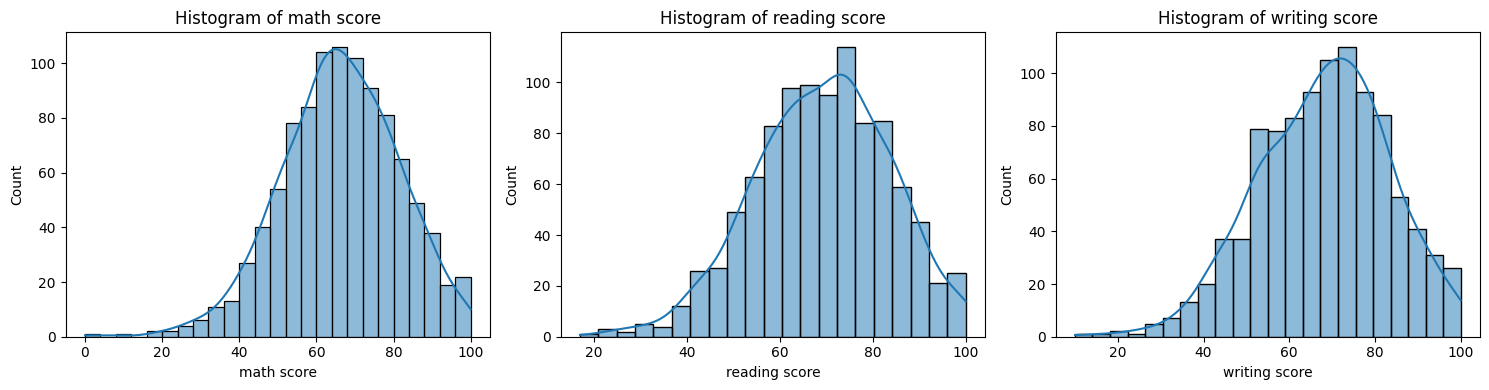

In [6]:
n = len(list(df.select_dtypes(exclude='object').columns))
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))

axes = axes.flatten()
print('Histograms of numerical columns: ')
for i, col in enumerate(df.select_dtypes(exclude='object').columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Histograms of numerical columns: 


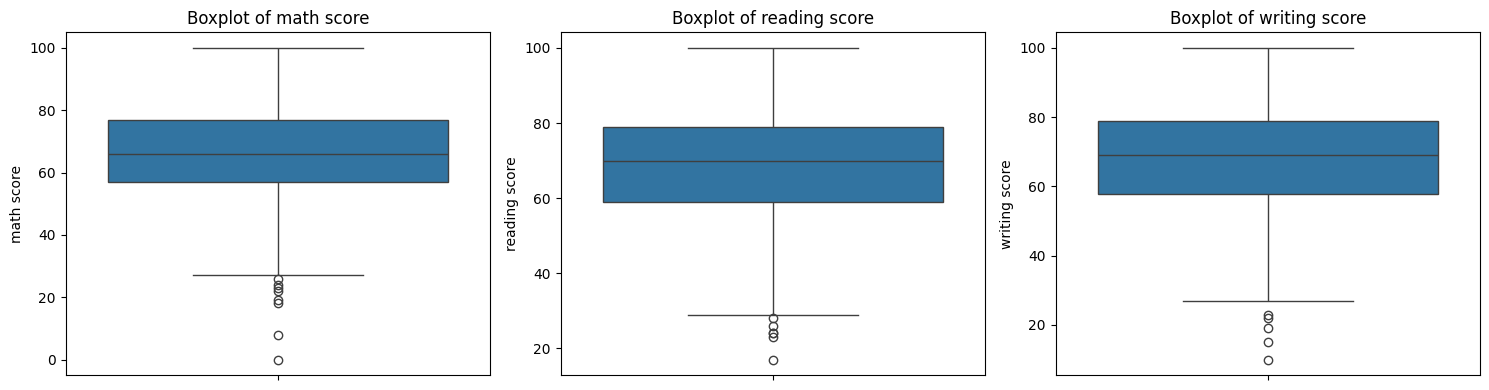

In [7]:
n = len(list(df.select_dtypes(exclude='object').columns))
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))

axes = axes.flatten()
print('Histograms of numerical columns: ')
for i, col in enumerate(df.select_dtypes(exclude='object').columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    # axes[i].set_xlabel(col)
    # axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
